In [1]:
import pandas as pd

wine = pd.read_csv('wine_csv_data.csv') #파일을 읽기

print(type(wine))
# wine


<class 'pandas.core.frame.DataFrame'>


In [2]:
wine.head(2) #머리: 위에서부터 default = 5

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0


In [3]:
wine.tail(3) #꼬리: 아래에서부터

,alcohol,sugar,pH,class
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0
6496,11.8,0.8,3.26,1.0


In [4]:
#DataFrame
wine.info()  #information <-  정보

# Missing Value ( 결측치 )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [5]:
wine.describe() # 서술하다, 묘사하다

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [6]:
input_data = wine[['alcohol', 'sugar', 'pH']]


In [7]:
data = input_data.to_numpy() #넘파이 배열로

print(type(data))
print(data.shape)
data

<class 'numpy.ndarray'>
(6497, 3)


array([[ 9.4 ,  1.9 ,  3.51],
       [ 9.8 ,  2.6 ,  3.2 ],
       [ 9.8 ,  2.3 ,  3.26],
       ...,
       [ 9.4 ,  1.2 ,  2.99],
       [12.8 ,  1.1 ,  3.34],
       [11.8 ,  0.8 ,  3.26]])

In [8]:
target = wine['class'].to_numpy()
print(type(target))
print(target.shape)
target

<class 'numpy.ndarray'>
(6497,)


array([0., 0., 0., ..., 1., 1., 1.])

In [9]:
#data, target
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

print(train_data.shape)
print(test_data.shape)

(5197, 3)
(1300, 3)


In [10]:
#Standard Score
# 특성의 평균, 표준편차

In [11]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(train_data) #학습데이터셋의 평균과 표준편차를 계산

train_scaled = ss.transform(train_data) # transform 동사 : 변환시키다.
test_scaled = ss.transform(test_data)

print(train_scaled)
print(train_data)

[[ 0.01376574  0.4646116  -0.16888369]
 [ 1.60871671 -0.70299854  0.26967864]
 [ 1.10504798 -0.70299854  1.20945505]
 ...
 [-0.82568214  0.0267578   0.14437512]
 [-0.82568214  0.52716215 -0.23153545]
 [-0.82568214 -0.57789745  1.83597265]]
[[10.5   7.7   3.19]
 [12.4   2.1   3.26]
 [11.8   2.1   3.41]
 ...
 [ 9.5   5.6   3.24]
 [ 9.5   8.    3.18]
 [ 9.5   2.7   3.51]]


In [12]:
train_scaled = ss.fit_transform(train_data)
print(train_scaled)

[[ 0.01376574  0.4646116  -0.16888369]
 [ 1.60871671 -0.70299854  0.26967864]
 [ 1.10504798 -0.70299854  1.20945505]
 ...
 [-0.82568214  0.0267578   0.14437512]
 [-0.82568214  0.52716215 -0.23153545]
 [-0.82568214 -0.57789745  1.83597265]]


In [13]:
# (입력 데이터) train_scaled, test_scaled
# (레이블) train_target, test_target

In [14]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

kn.fit(train_scaled, train_target)

print('학습 데이터셋 : ', kn.score(train_scaled, train_target))
print('학습 데이터셋 : ', kn.score(test_scaled, test_target))

학습 데이터셋 :  0.9022512988262459
학습 데이터셋 :  0.8346153846153846


최적의 k값: 23
최고의 정확도: 0.85


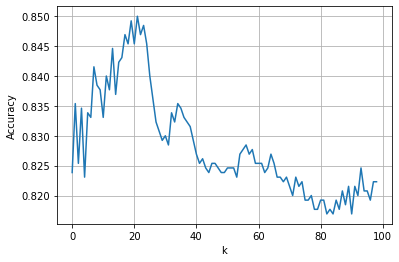

In [15]:
score = 0 # 분류 정확도 0
hist = []
for k in range(2, 101):
    kn.n_neighbors = k # 2부터 100까지 값을 변경해 가면서 최적의 k값을 찾는다
    
    tmp = kn.score(test_scaled, test_target)
    hist.append(tmp)
    if score < tmp:
        score = tmp
        best_k = k
        
print('최적의 k값:', best_k)
print('최고의 정확도:', score)

import matplotlib.pyplot as plt

plt.figure()
plt.plot(hist)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [16]:
from sklearn.tree import DecisionTreeClassifier

#특성의 순서를 섞는다
dt = DecisionTreeClassifier(random_state=42)

dt.fit(train_scaled, train_target)

print( "학습 데이터셋 : ", dt.score(train_scaled, train_target))
print( "시험 데이터셋 : ", dt.score(test_scaled, test_target))

학습 데이터셋 :  0.996921300750433
시험 데이터셋 :  0.8592307692307692


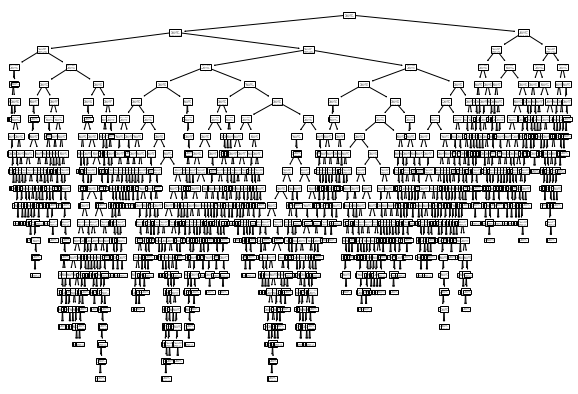

In [17]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 7))
plot_tree(dt)
plt.show()

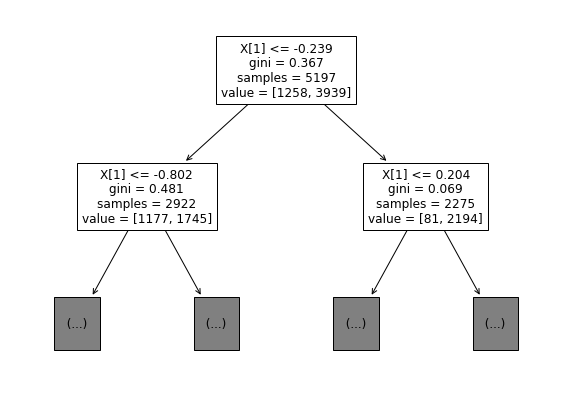

In [18]:
plt.figure(figsize=(10, 7))
plot_tree(dt, max_depth=1) #max 최대 / depth 깊이
plt.show()

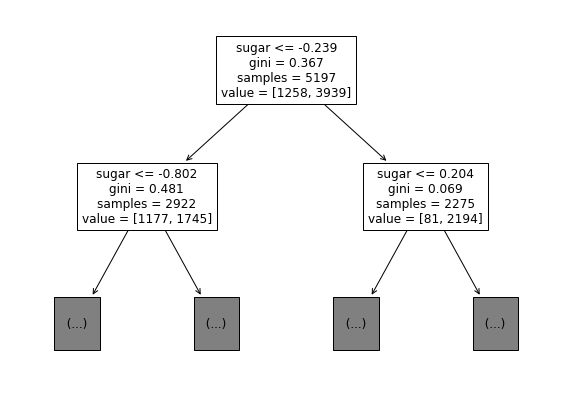

In [19]:
plt.figure(figsize=(10, 7))
plot_tree(dt, max_depth=1, feature_names=['alcohol', 'sugar', 'pH']) #max 최대 / depth 깊이
plt.show()

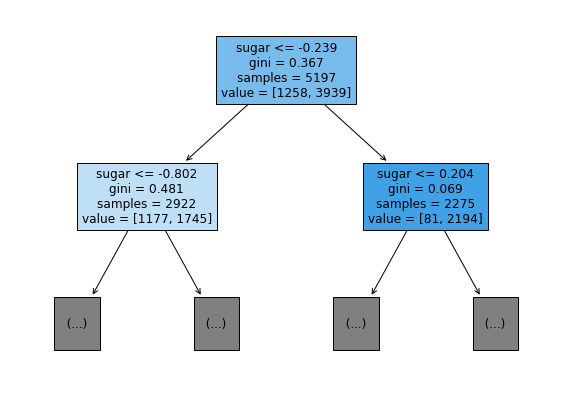

In [20]:
plt.figure(figsize=(10, 7))
plot_tree(dt, max_depth=1, feature_names=['alcohol', 'sugar', 'pH'], filled= True) #max 최대 / depth 깊이
plt.show()

In [23]:
dt.fit(train_scaled, train_target)
print( "학습 데이터셋 : ", dt.score(train_scaled, train_target))
print( "시험 데이터셋 : ", dt.score(test_scaled, test_target))

학습 데이터셋 :  0.996921300750433
시험 데이터셋 :  0.8592307692307692


In [24]:
dt = DecisionTreeClassifier(random_state=42, max_depth=3) #사전 가지치기

dt.fit(train_scaled, train_target)
print( "학습 데이터셋 : ", dt.score(train_scaled, train_target))
print( "시험 데이터셋 : ", dt.score(test_scaled, test_target))

학습 데이터셋 :  0.8454877814123533
시험 데이터셋 :  0.8415384615384616


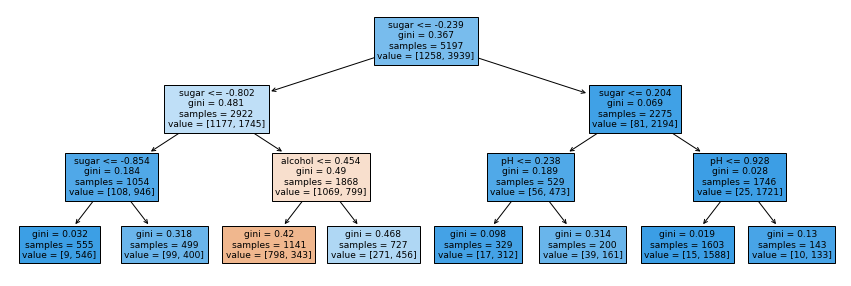

In [25]:
plt.figure(figsize=(15,5))
plot_tree(dt, feature_names=['alcohol', 'sugar', 'pH'], filled=True)
plt.show()

In [26]:
#표준점수로 만든 것

dt = DecisionTreeClassifier(random_state=42, max_depth=3) 
dt.fit(train_scaled, train_target)
print( "학습 데이터셋 : ", dt.score(train_scaled, train_target))
print( "시험 데이터셋 : ", dt.score(test_scaled, test_target))

학습 데이터셋 :  0.8454877814123533
시험 데이터셋 :  0.8415384615384616


In [27]:
#표준점수로 만들기 전

dt = DecisionTreeClassifier(random_state=42, max_depth=3) 
dt.fit(train_data, train_target)
print( "학습 데이터셋 : ", dt.score(train_data, train_target))
print( "시험 데이터셋 : ", dt.score(test_data, test_target))

학습 데이터셋 :  0.8454877814123533
시험 데이터셋 :  0.8415384615384616


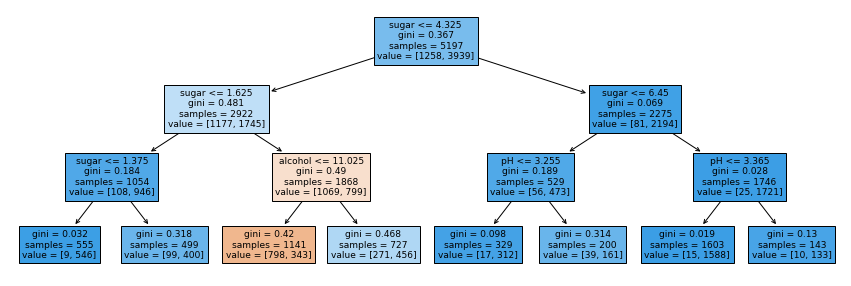

In [28]:
plt.figure(figsize=(15,5))
plot_tree(dt, feature_names=['alcohol', 'sugar', 'pH'], filled=True)
plt.show()

In [31]:
# 특성 중요도 (Feature Importance)

A = dt.feature_importances_
print(sum(A))


# alcohol  =  0.12345626
#sugar     =  0.86862934 
#pH        =  0 .0079144 

0.9999999999999999
